In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 20
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

train_data_gen = train_image_generator.flow_from_directory(
	directory=train_dir,
  batch_size=batch_size,
  class_mode='binary',
  target_size=(IMG_HEIGHT, IMG_WIDTH)
)
val_data_gen = validation_image_generator.flow_from_directory(
	directory=validation_dir,
  batch_size=batch_size,
  class_mode='binary',
  target_size=(IMG_HEIGHT, IMG_WIDTH)
)
test_data_gen = test_image_generator.flow_from_directory(
	directory=test_dir,
  batch_size=1,
  class_mode=None,
  classes=['.'],
  target_size=(IMG_HEIGHT, IMG_WIDTH),
  shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


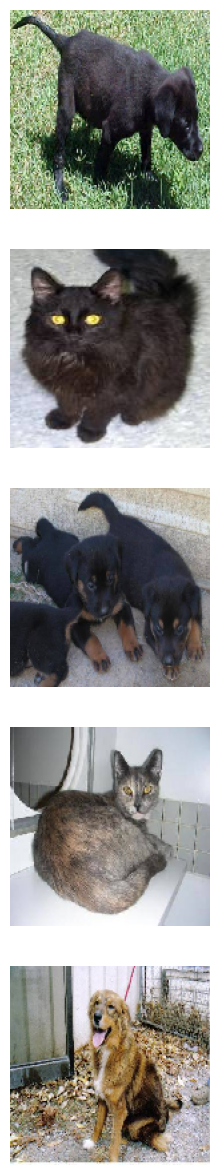

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40, # From 0-180 degrees.
      width_shift_range=0.2, # Move the subject left to right.
      height_shift_range=0.2, # Move the subject up and down.
      shear_range=0.2, # Skew the image up to 20%.
      zoom_range=0.2, # Zoom up to 20%.
      horizontal_flip=True,
      fill_mode='nearest') # If we lose pixels while moving they will be filled.


Found 2000 images belonging to 2 classes.


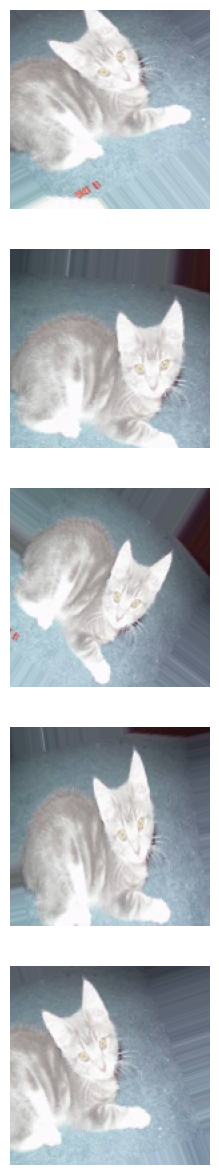

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(
	directory=train_dir,
  batch_size=batch_size,
  class_mode='binary',
  target_size=(IMG_HEIGHT, IMG_WIDTH)
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
# model = Sequential()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
# 8
history = model.fit(
  train_data_gen,
	validation_data = val_data_gen,
	steps_per_epoch = 100,
	epochs = epochs,
	validation_steps = 50,
	verbose = 2
)

Epoch 1/15
100/100 - 13s - loss: 0.6853 - accuracy: 0.5495 - val_loss: 0.6449 - val_accuracy: 0.6450 - 13s/epoch - 129ms/step
Epoch 2/15
100/100 - 13s - loss: 0.6538 - accuracy: 0.6165 - val_loss: 0.6313 - val_accuracy: 0.6300 - 13s/epoch - 134ms/step
Epoch 3/15
100/100 - 14s - loss: 0.6518 - accuracy: 0.6210 - val_loss: 0.6284 - val_accuracy: 0.6050 - 14s/epoch - 139ms/step
Epoch 4/15
100/100 - 13s - loss: 0.6269 - accuracy: 0.6415 - val_loss: 0.6285 - val_accuracy: 0.5850 - 13s/epoch - 135ms/step
Epoch 5/15
100/100 - 13s - loss: 0.6257 - accuracy: 0.6455 - val_loss: 0.5750 - val_accuracy: 0.6900 - 13s/epoch - 129ms/step
Epoch 6/15
100/100 - 13s - loss: 0.6240 - accuracy: 0.6645 - val_loss: 0.5471 - val_accuracy: 0.7350 - 13s/epoch - 131ms/step
Epoch 7/15
100/100 - 14s - loss: 0.5971 - accuracy: 0.6860 - val_loss: 0.6355 - val_accuracy: 0.6350 - 14s/epoch - 144ms/step
Epoch 8/15
100/100 - 13s - loss: 0.5903 - accuracy: 0.6775 - val_loss: 0.5622 - val_accuracy: 0.7700 - 13s/epoch - 135

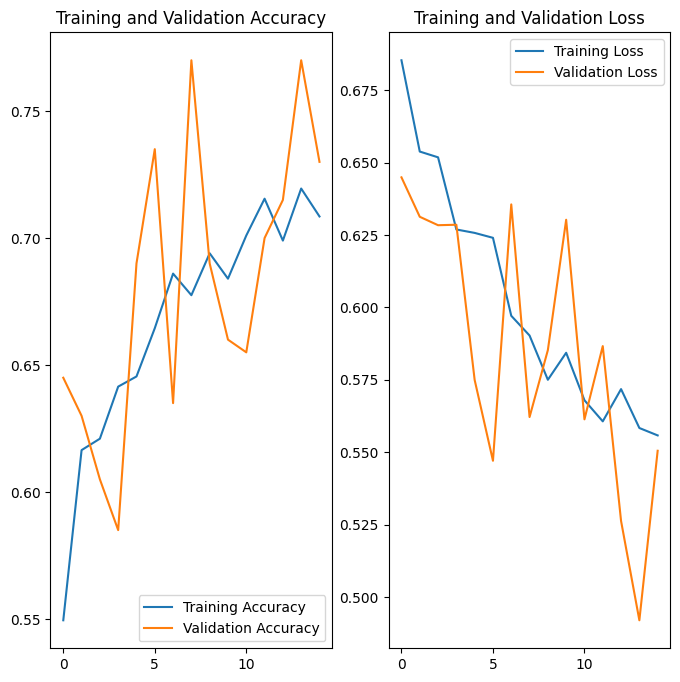

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
classes = model.predict(test_data_gen, batch_size=1)

50/50 [==============================] - 0s 3ms/step


In [ ]:
probabilities = []
for prediction in classes:
  probabilities.append(prediction[0])

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
